<a href="https://colab.research.google.com/github/OscarGuti17/Ejercicio-Curso/blob/main/Metricas_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

df = pd.read_csv('/content/sample_data/Boston_Housing_from_Sklearn.csv')
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


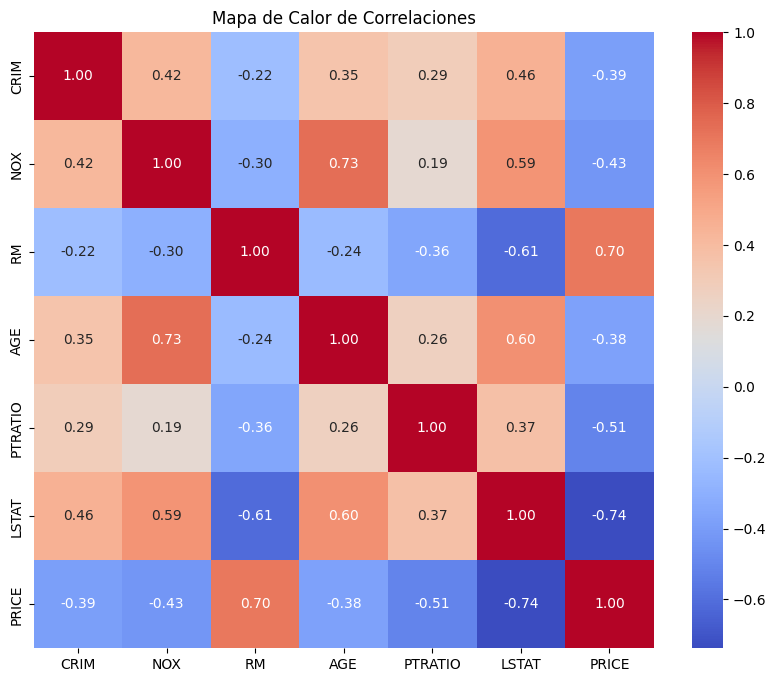

In [8]:
# Paso 1: Realizar un mapa de calor de las correlaciones
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlaciones')
plt.show()

In [22]:
# Identificar las características con coeficiente de correlación |r| >= 0.5 con el precio
correlation_with_price = correlation_matrix['PRICE']
significant_correlations = correlation_with_price[abs(correlation_with_price) >= 0.5].drop('PRICE')
significant_features = significant_correlations.index.tolist()
significant_features

['RM', 'PTRATIO', 'LSTAT']

In [31]:
# Paso 2 seleccionar columnas para la matriz de caracteristicas (X) y el precio para vector objetivo (y)
X = df[significant_features]
y = df['PRICE']

In [20]:
# Paso 3: Dividir los datos en conjuntos de entrenamientos y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Paso 4 Intanciar y ajustar el modelo al conjunto de entrenamiento
model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
#  Paso 5 : Evaluar el rendimiento del modelo en los conjuntos de entrenamiento y pruebas utilizando R'2
train_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)
print("R'2 en el conjunto de entrenamiento:", train_r2)
print("R'2 en el conjunto de prueba:", test_r2)

R'2 en el conjunto de entrenamiento: 0.6864566575056517
R'2 en el conjunto de prueba: 0.6302528487272827


In [26]:
# Paso 6 Evaluar el modelo utilizando el error absoluto medio (EAM)
train_mse = mean_squared_error(y_train, model.predict(X_train))
test_mse = mean_squared_error(y_test, model.predict(X_test))
print("Error absoluto medio en el conjunto de entrenamiento:", train_mse)
print("Error absoluto medio en el conjunto de prueba:", test_mse)
#

Error absoluto medio en el conjunto de entrenamiento: 27.23857741164684
Error absoluto medio en el conjunto de prueba: 27.114957415580577


In [28]:
# Paso 7 Evaluar el modelo utilizando el error cuadrático medio (ECM).
train_ecm = mean_squared_error(y_train, model.predict(X_train))
test_ecm = mean_squared_error(y_test, model.predict(X_test))
print("Error cuadrático medio en el conjunto de entrenamiento:", train_ecm)
print("Error cuadrático medio en el conjunto de prueba:", test_ecm)
#

Error cuadrático medio en el conjunto de entrenamiento: 27.23857741164684
Error cuadrático medio en el conjunto de prueba: 27.114957415580577


In [30]:
# Paso 8 Evaluar el modelo de rendimiento usando RECM en el conjunto de entrenamiento y de prueba.
#Esta métrica es útil porque las unidades estarán en las mismas unidas del vector objetivo. En este caso mil dólares.
train_recm = r2_score(y_train, model.predict(X_train))
test_recm = r2_score(y_test, model.predict(X_test))
print("REC en el conjunto de entrenamiento:", train_recm)
print("REC en el conjunto de prueba:", test_recm)
#

REC en el conjunto de entrenamiento: 0.6864566575056517
REC en el conjunto de prueba: 0.6302528487272827
